In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split , GridSearchCV
dta = sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0 represents not;traform discrete data into continuous data 
dta['affair'] = (dta.affairs >0).astype(int)
## one hot encoding 
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X = X.drop(columns = ['Intercept'])
y = np.ravel(y)

In [2]:
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [3]:
X.describe()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


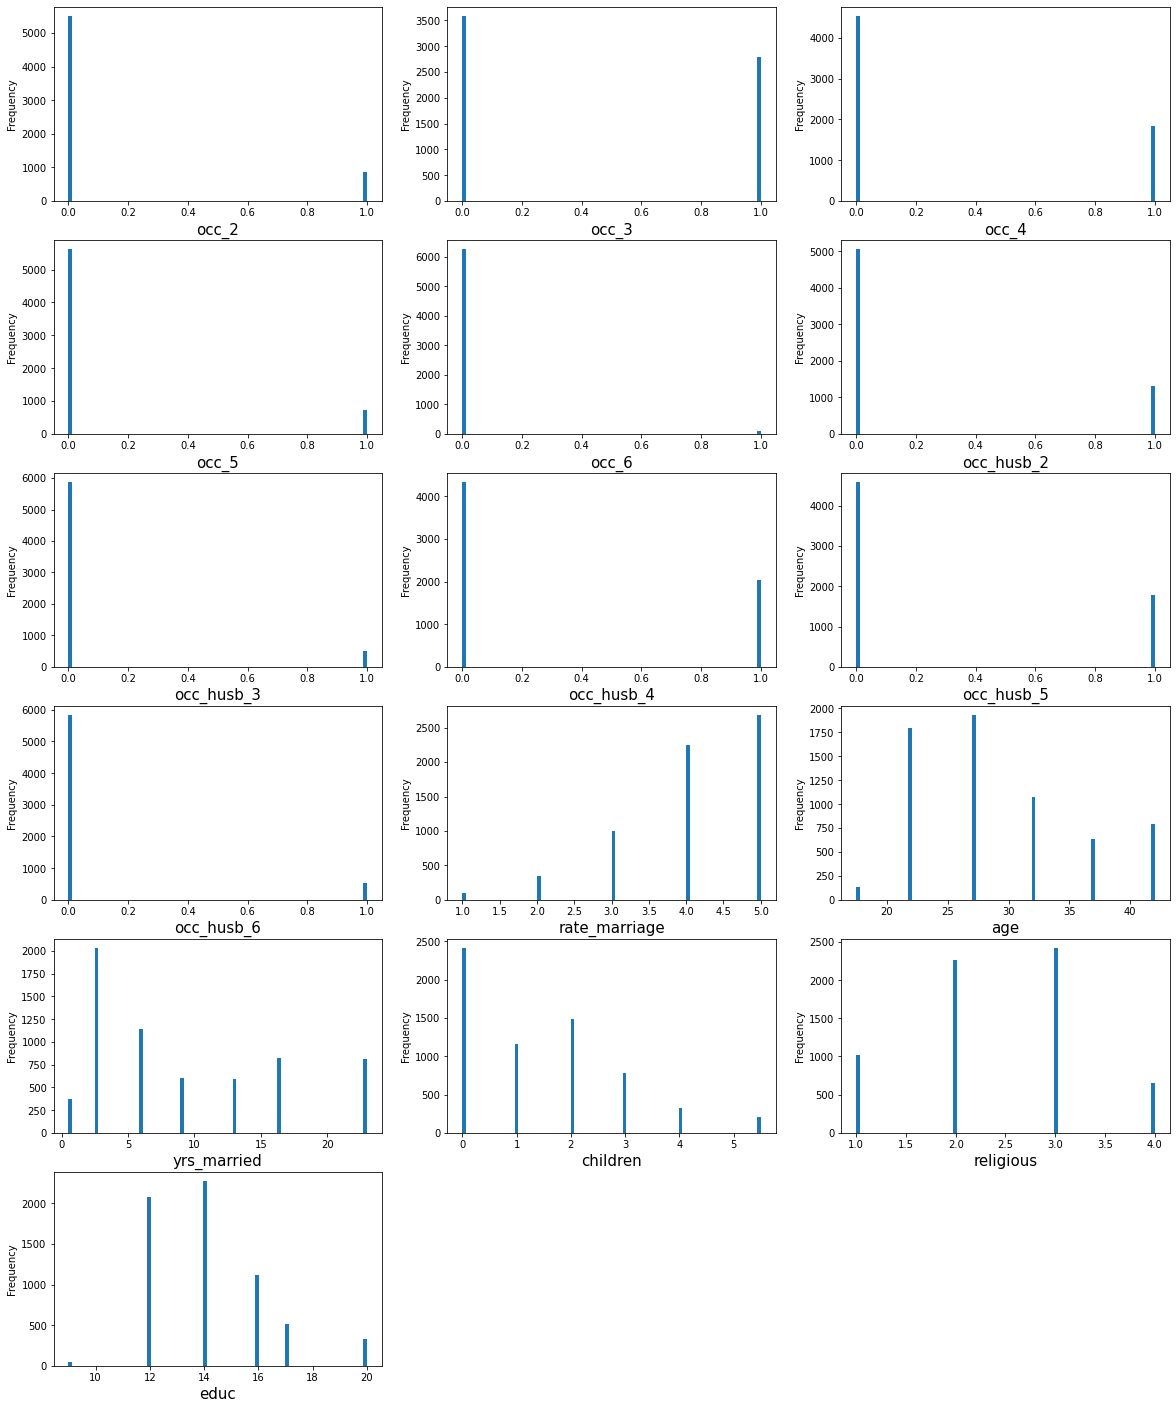

In [4]:
## EDA 
plt.figure(figsize=(20,25), facecolor='white')
plotNum = 1
for col in X.columns:
    ax = plt.subplot(6,3,plotNum)
    X[col].plot.hist(bins=80)
    plt.xlabel(col,fontsize=15)
    plotNum+=1
## why the picture are strange -- discrete data 

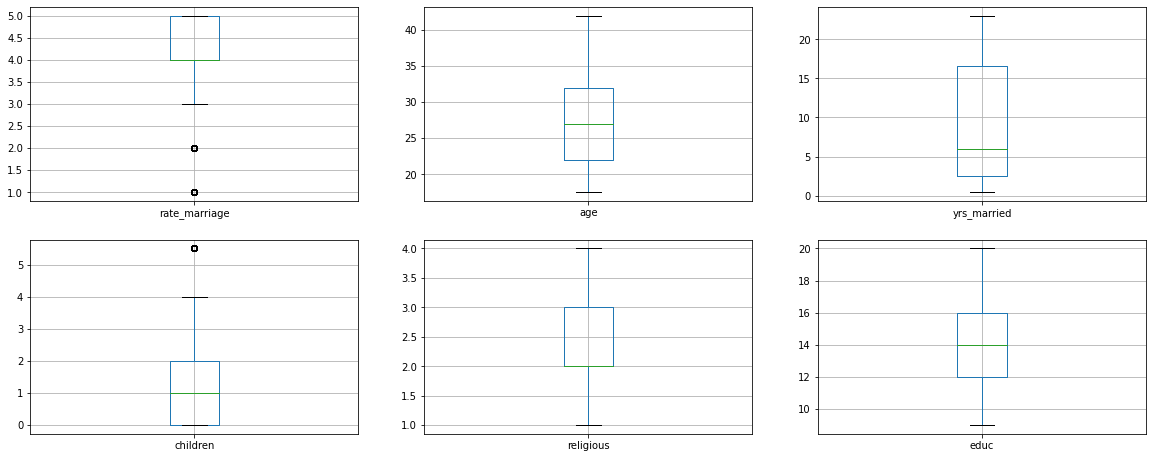

In [5]:
## remove outlier 
plt.figure(figsize=(20,25), facecolor='white')
plotNum = 1
for col in X.columns[10:]:
    ax = plt.subplot(6,3,plotNum)
    X.boxplot(column=[col])
    plotNum+=1
## no need to remove outlier, since the value is in reasonale range 

In [6]:
## checking imbalance data ?
from collections import Counter
Counter(y)

Counter({1.0: 2053, 0.0: 4313})

In [7]:
## nearly 70% not having affair 
4313/(4313+2053)

0.6775054979579014

In [8]:
## data scaling 
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [9]:
## over sampling 
from imblearn.over_sampling import RandomOverSampler
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = .3,random_state = 1001)
os =  RandomOverSampler()

X_train_res, y_train_res = os.fit_resample(X_train, y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0.0: 3007, 1.0: 1449})
Resampled dataset shape Counter({0.0: 3007, 1.0: 3007})


In [10]:
## model traing + gridsearCV

log_reg = LogisticRegression()
param = {'penalty':['elasticnet'],
         'C':10.0**np.arange(-2,3),
         'l1_ratio':[i/100 for i in range (0,101,25)],
         'solver':['saga']
        }
clf = GridSearchCV(estimator=log_reg,
                   param_grid=param,
                   cv=5,
                   n_jobs =-1)
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)

In [11]:
clf.best_params_

{'C': 1.0, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'saga'}

In [12]:
clf.best_score_

0.6814087908348927

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = clf.predict(X_test)
p = print
p(accuracy_score(y_test,y_pred))
p(confusion_matrix(y_test,y_pred))
p(classification_report(y_test,y_pred))


0.6816753926701571
[[912 394]
 [214 390]]
              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75      1306
         1.0       0.50      0.65      0.56       604

    accuracy                           0.68      1910
   macro avg       0.65      0.67      0.66      1910
weighted avg       0.71      0.68      0.69      1910

